<a href="https://colab.research.google.com/github/wareissoft/2024_VAI/blob/main/%EC%8B%9C%EA%B0%81%EC%A7%80%EB%8A%A5_9%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

1. MNIST train, test dataset 가져오기

In [2]:
mnist_train = dset.MNIST("", train=True, transform = transforms.ToTensor(), target_transform = None, download=True)
mnist_test = dset.MNIST("", train=False, transform = transforms.ToTensor(), target_transform = None, download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 17155291.31it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 488515.38it/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4437285.72it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 453724.46it/s]


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



2. 대략적인 데이터 형태

mnist_train 길이:  60000
mnist_test 길이:  10000
image data 형태:  torch.Size([1, 28, 28])
label:  5


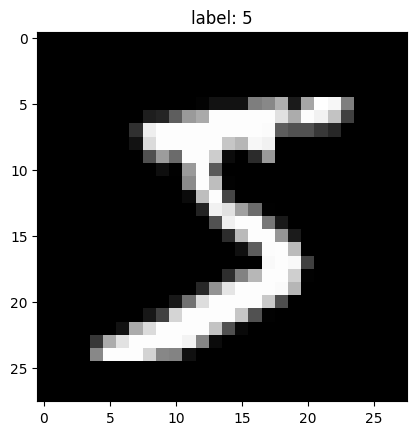

In [3]:
print ("mnist_train 길이: ", len(mnist_train))
print ("mnist_test 길이: ", len(mnist_test))

image, label = mnist_train.__getitem__(0)
print ("image data 형태: ", image.size())
print ("label: ", label)

img = image.numpy()
plt.title("label: %d" %label)
plt.imshow(img[0], cmap='gray')
plt.show()

3. 데이터 로드함수

In [4]:
batch_size = 1024
learning_rate = 0.01
num_epochs = 400

In [5]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size = batch_size, shuffle = True, num_workers=2, drop_last = True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size = batch_size, shuffle = False, num_workers=2, drop_last = True)

데이터 로드함수 이해하기

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[0]
한 번에 로드되는 데이터 크기:  1024


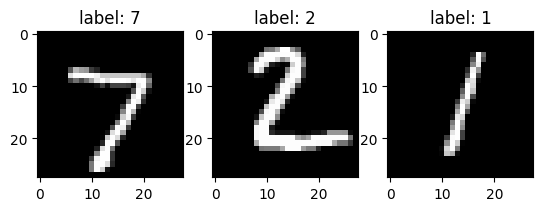

[1]
한 번에 로드되는 데이터 크기:  1024


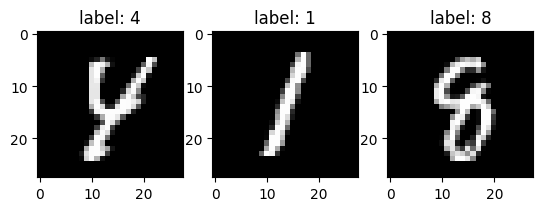

[2]
한 번에 로드되는 데이터 크기:  1024


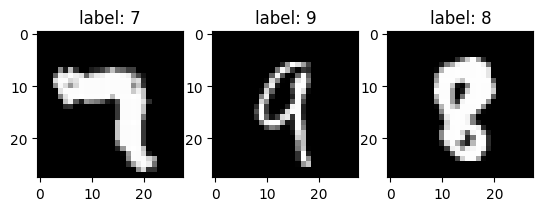

[3]
한 번에 로드되는 데이터 크기:  1024


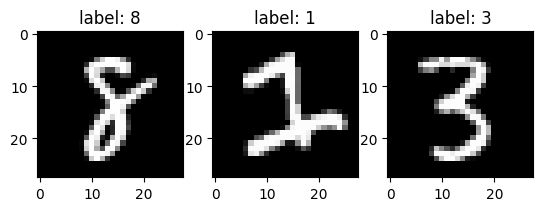

[4]
한 번에 로드되는 데이터 크기:  1024


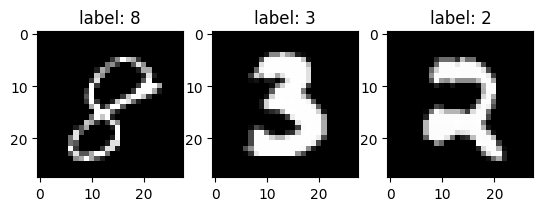

[5]
한 번에 로드되는 데이터 크기:  1024


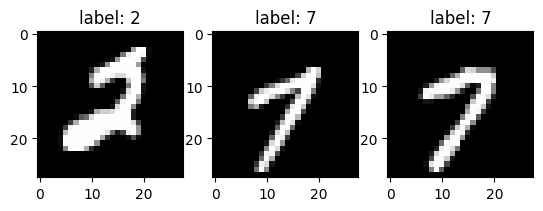

In [6]:
n = 3
for i, [imgs, labels] in enumerate(test_loader):
    if i > 5:
        break
    print ("[%d]" %i)
    print ("한 번에 로드되는 데이터 크기: ", len(imgs))

    for j in range(n):
        img = imgs[j].numpy()
        img = img.reshape((img.shape[1], img.shape[2]))

        plt.subplot(1, n, j+1)
        plt.imshow(img, cmap = "gray")
        plt.title("label: %d" %labels[j])
    plt.show()

4. 모델 선언

In [7]:
model = nn.Sequential(
    nn.Linear(28 * 28, 256),
    nn.Sigmoid(),
    nn.Linear(256, 128),
    nn.Linear(128, 10)
)

In [8]:
def ComputeAccr(dloader, imodel):
    correct = 0
    total = 0

    for j, [imgs, labels] in enumerate(dloader):
        img = imgs
        label = Variable(labels)

        img = img.reshape((img.shape[0], img.shape[2], img.shape[3]))
        img = img.reshape((img.shape[0], img.shape[1] * img.shape[2]))
        img = Variable(img, requires_grad = False)

        output = imodel(img)
        _, output_index = torch.max(output, 1)

        total += label.size(0)
        correct += (output_index == label).sum().float()
    print ("Accuracy of Test Data: {}".format(100 * correct / total))

In [9]:
ComputeAccr(test_loader, model)

Accuracy of Test Data: 9.765625


5. loss, optimizer

In [10]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

6. 학습

In [11]:
num_epoch = 400
for i in range(num_epoch):
    for j, [imgs, labels] in enumerate(train_loader):
      img = imgs
      label = Variable(labels)

      img = img.reshape((img.shape[0], img.shape[2], img.shape[3]))
      img = img.reshape((img.shape[0], img.shape[1] * img.shape[2]))
      img = Variable(img, requires_grad = True)

      optimizer.zero_grad()
      output = model(img)
      loss = loss_func(output, label)

      loss.backward()
      optimizer.step()

    if i % 50 == 0:
      print ("%d.." %i)
      ComputeAccr(test_loader, model)
      print (loss)

0..
Accuracy of Test Data: 11.295573234558105
tensor(2.2929, grad_fn=<NllLossBackward0>)
50..
Accuracy of Test Data: 81.03298950195312
tensor(0.6559, grad_fn=<NllLossBackward0>)
100..
Accuracy of Test Data: 88.23784637451172
tensor(0.3982, grad_fn=<NllLossBackward0>)
150..
Accuracy of Test Data: 89.96310424804688
tensor(0.3534, grad_fn=<NllLossBackward0>)
200..
Accuracy of Test Data: 90.74435424804688
tensor(0.3316, grad_fn=<NllLossBackward0>)
250..
Accuracy of Test Data: 91.31944274902344
tensor(0.2991, grad_fn=<NllLossBackward0>)
300..
Accuracy of Test Data: 91.62326049804688
tensor(0.2973, grad_fn=<NllLossBackward0>)
350..
Accuracy of Test Data: 91.91622924804688
tensor(0.2924, grad_fn=<NllLossBackward0>)


7. 테스트

In [12]:
ComputeAccr(test_loader, model)

Accuracy of Test Data: 92.07899475097656


8. 학습된 파라미터 저장

In [14]:
netname = "model.pkl"
torch.save(model, netname, )

9. (Optional) 실습 1에 쓰인 .npz 만드려면?

In [18]:
np.savez_compressed("./nets/mlp_weight.npz",
                    W1 = W1, b1 = b1,
                    W2 = W2, b2 = b2,
                    W3 = W3, b3 = b3)

NameError: name 'W1' is not defined